# Lista 3- Dissecação placa, carregamento parabólico

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp

### É definido as variaveis de modo simbólico

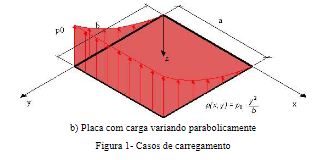

In [18]:
x,y,a,b,p,wm,v,d,E,f,h=smp.symbols('x y a b p wm v d E f h')
m,n,i,j=smp.symbols('m n i j', int=True)

#### É calculado a amplitude _fmn_ da serie de fourier do carregamento parabólico por dupla serie

In [3]:
f=p*y**2/b**2
freq=smp.sin(x*smp.pi*m/a)*smp.sin(y*smp.pi*n/b)
fmn=4/a/b*smp.integrate(smp.integrate(f*freq,(x,0,a)),(y,0,b))
fmn



4*Piecewise((2*a*b*p*cos(pi*m)/(pi**4*m*n**3) - 2*a*b*p/(pi**4*m*n**3) - a*p*(-b**3*cos(pi*n)/(pi*n) + 2*b**3*sin(pi*n)/(pi**2*n**2) + 2*b**3*cos(pi*n)/(pi**3*n**3))*cos(pi*m)/(pi*b**2*m) + a*p*(-b**3*cos(pi*n)/(pi*n) + 2*b**3*sin(pi*n)/(pi**2*n**2) + 2*b**3*cos(pi*n)/(pi**3*n**3))/(pi*b**2*m), Ne(n, 0) & Ne(pi*m/a, 0)), (0, True))/(a*b)

> É atribuidos valores para as propriedade e dimensões da placa. A amplitude do deslocamento da placa foi obtido pela solução de navier devido as condições de contorno bi apoiadas
<br>

$\Large wmn=\frac{fmn}{d\pi^4((\frac{m^2}{a^2})+\frac{n^2}{b^2})^2)}$

>dessa forma o deslocamento é dado:
<br>

$\Large w(x,y)=\Sigma\Sigma wmn\sin{\frac{n\pi y}{b}}\sin{\frac{m\pi x}{a}}$

In [4]:
E=25000000
v=0.2
h=0.3
d=E*h**3/(12*(1-v**2))

wmn=fmn/(d*smp.pi**4*((m**2/a**2)+(n**2/b**2))**2)
w=wmn*freq
wwa=smp.summation((smp.summation(w*freq,(n,1,15))),(m,1,15))
W=wwa.subs([(a,15),(b,10),(p,10)])

In [5]:
dwdx2=smp.diff((smp.diff(W,x)),x)
dwdy2=smp.diff((smp.diff(W,y)),y)
mx=(dwdx2+v*dwdy2)*d
my=(dwdy2+v*dwdx2)*d
mxy=(1-v)*(smp.diff((smp.diff(W,x)),y))

In [6]:
dwdx3=smp.diff(smp.diff((smp.diff(W,x)),x),x)
dwdy3=smp.diff(smp.diff((smp.diff(W,y)),y),y)
dwx2y=smp.diff(smp.diff((smp.diff(W,x)),x),y)
dwxy2=smp.diff(smp.diff((smp.diff(W,x)),y),y)
vx=-d*(dwdx3+(2-v)*dwxy2)
vy=-d*(dwdy3+(2-v)*dwx2y)
dx=-h/2*dwdx2
dy=-h/2*dwdy2
gama=-h*(smp.diff((smp.diff(W,x)),y))



In [7]:
WW=smp.lambdify([x,y],W)
Mx=smp.lambdify([x,y],mx)
My=smp.lambdify([x,y],my)
Mxy=smp.lambdify([x,y],mxy)
Vx=smp.lambdify([x,y],vx)
Vy=smp.lambdify([x,y],vy)
εx=smp.lambdify([x,y],dx)
εy=smp.lambdify([x,y],dy)
γ=smp.lambdify([x,y],gama)

In [8]:
m1 = np.linspace(0,15,200)
m2 = np.linspace(0,10,200)
x1,y1=np.meshgrid(m1,m2)

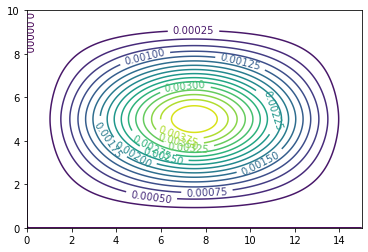

<Figure size 720x720 with 0 Axes>

In [27]:
cont=plt.contour(x1,y1,WW(x1,y1),levels=20)
plt.clabel(cont)


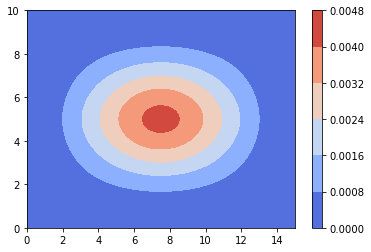

In [10]:
plt.contourf(x1,y1,WW(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

<Figure size 720x144 with 0 Axes>

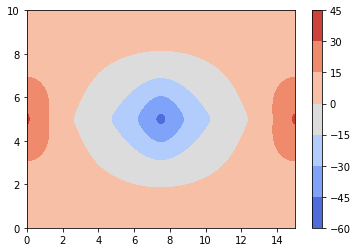

<Figure size 720x144 with 0 Axes>

In [29]:
plt.contourf(x1,y1,Mx(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()


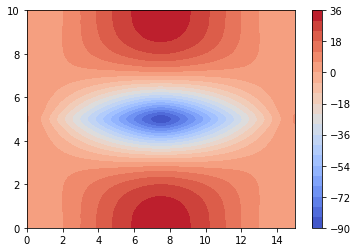

In [12]:
plt.contourf(x1,y1,My(x1,y1),levels=20,cmap='coolwarm')
plt.colorbar()

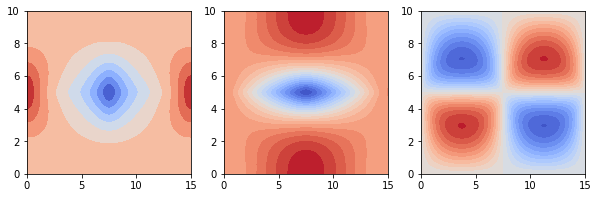

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
ax = axes[0]
ax.contourf(x1,y1,Mx(x1,y1),levels=10,cmap='coolwarm')
ax1= axes[1]
ax1.contourf(x1,y1,My(x1,y1),levels=20, cmap='coolwarm')
ax2= axes[2]
ax2.contourf(x1,y1,Mxy(x1,y1),levels=20, cmap='coolwarm')

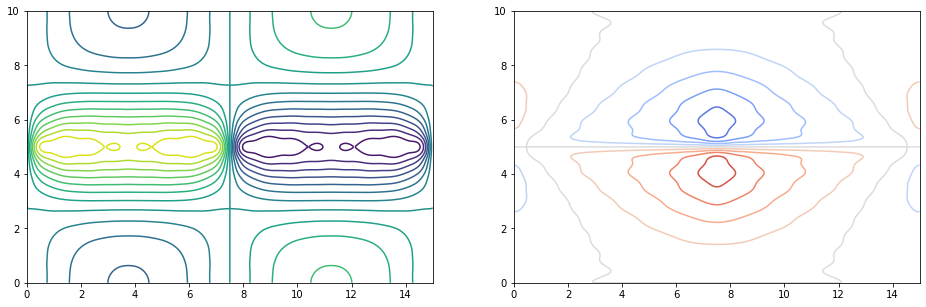

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,Vx(x1,y1),levels=15,)
ax1= axes[1]
ax1.contour(x1,y1,Vy(x1,y1),levels=10, cmap='coolwarm')

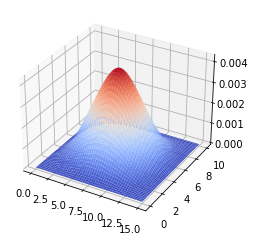

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1,y1,WW(x1,y1),cmap='coolwarm',)



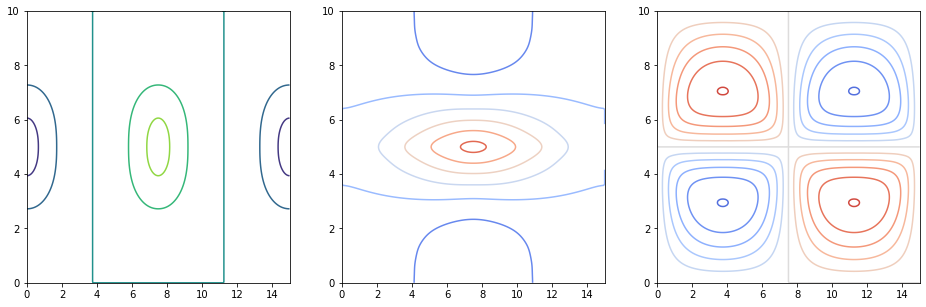

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,εx(x1,y1),levels=5,)
ax1= axes[1]
ax1.contour(x1,y1,εy(x1,y1),levels=5, cmap='coolwarm')
ax2= axes[2]
ax2.contour(x1,y1,γ(x1,y1),levels=10, cmap='coolwarm')